## Design Summary

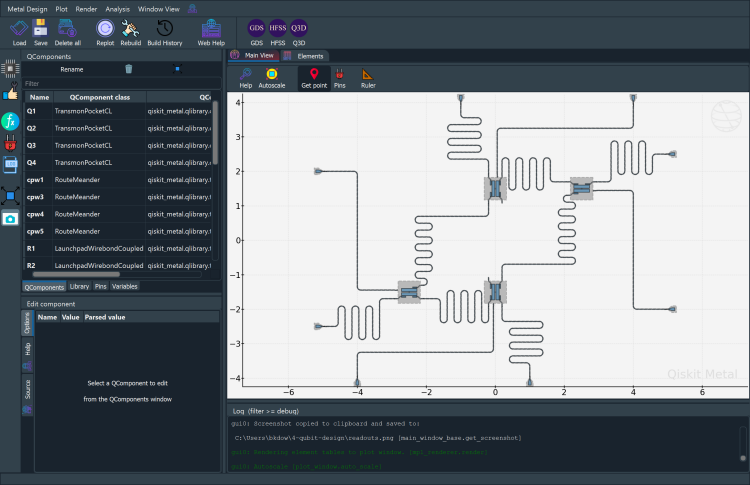


Target frequencies are summarized below. Frequency spacings are set to be as large as possible within the given constraint on the available electronnics to minimize the crosstalk. Target readout frequencies are calculated from the set qubit frequencies with the formula $\chi\approx-\frac{g^2 E_c}{\Delta (\Delta-Ec)}$. Substituting the target values given in the problem yields a quadratic equation on the detuning $\Delta = \omega_q-\omega_r$, which gives the solution of $\Delta = -1.8$ or $1.5$.

### Target Frequencies
| Qubit # | Q1 | Q2 | Q3 | Q4|
|---|---|---|---|---|
|Freq(GHz)|5.25|5.42|5.58|5.75|

| RO # | RO1 | RO2 | RO3 | RO4|
|---|---|---|---|---|
|Freq(GHz)|7.05|7.22|7.38|7.55|

| CPW # | CPW1 | CPW2 | CPW3 | CPW4|
|---|---|---|---|---|
|Freq(GHz)|8.00|8.40|8.80|9.20|

### Achieved Frequencies
| Qubit # | Q1 | Q2 | Q3 | Q4|
|---|---|---|---|---|
|Freq(GHz)|5.25984|5.486713|5.557822|5.75221|

| RO # | RO1 | RO2 | RO3 | RO4|
|---|---|---|---|---|
|Freq(GHz)|6.7134|7.10829|7.38|7.78023|

| CPW # | CPW1 | CPW2 | CPW3 | CPW4|
|---|---|---|---|---|
|Freq(GHz)|7.78023|8.69631|8.767001|9.16086|

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
from qiskit_metal import designs, MetalGUI

design = designs.DesignPlanar()
design.overwrite_enabled = True

In [3]:
design.chips.main.size_x = '12mm'
design.chips.main.size_y = '10mm'

In [4]:
gui = MetalGUI(design)

In [5]:
from qiskit_metal.qlibrary.qubits.transmon_pocket_cl import TransmonPocketCL

design.delete_all_components()

design_span_x = 5
design_span_y = 3

half_chip_width = design_span_x / 2
half_chip_height = design_span_y / 2

connection_pads_options = dict(
    a = dict(loc_W=1, loc_H=-1),
    b = dict(loc_W=1, loc_H=1),
    c = dict(loc_W=-1, loc_H=-1)
)

connection23_pads_options = dict(
    a = dict(loc_W=1, loc_H=-1),
    c = dict(loc_W=-1, loc_H=-1)
)

transmons = []

transmons.append(TransmonPocketCL(design, 'Q1',
                      options=dict(pos_x=f'-{half_chip_width}mm',
                                   pos_y=f'{-half_chip_height}mm',
                                   connection_pads=dict(**connection_pads_options))))

transmons.append(TransmonPocketCL(design, 'Q2',
                      options=dict(pos_x=f'0mm',
                                   pos_y=f'{half_chip_height}mm',
                                   orientation=-90,
                                   connection_pads=dict(d=dict(loc_W=-1, loc_H=1), **connection23_pads_options))))

transmons.append(TransmonPocketCL(design, 'Q3',
                      options=dict(pos_x=f'0mm',
                                   pos_y=f'{-half_chip_height}mm',
                                   orientation=90,
                                   connection_pads=dict(d=dict(loc_W=-1, loc_H=1), **connection23_pads_options))))

transmons.append(TransmonPocketCL(design, 'Q4',
                      options=dict(pos_x=f'{half_chip_width}mm',
                                   pos_y=f'{half_chip_height}mm',
                                   orientation=180,
                                   connection_pads=dict(**connection_pads_options))))

gui.rebuild()
gui.autoscale()

In [6]:
from qiskit_metal.qlibrary.tlines.meandered import RouteMeander
from qiskit_metal import Dict

fillet='99.99um'
options = Dict(
    meander=Dict(
        lead_start='0.1mm',
        lead_end='0.1mm',
        asymmetry='0 um')
)

def connect(component_name: str, component1: str, pin1: str, component2: str, pin2: str,
            length: str,
            asymmetry='0 um', start_strght='0 um', end_strght='0 um', flip=False):
    """Connect two pins with a CPW."""
    myoptions = Dict(
        pin_inputs=Dict(
            start_pin=Dict(
                component=component1,
                pin=pin1),
            end_pin=Dict(
                component=component2,
                pin=pin2)),
        lead=Dict(
            start_straight=start_strght,
            end_straight=end_strght
        ),
        total_length=length,
    fillet = '99.9um')
    myoptions.update(options)
    myoptions.meander.asymmetry = asymmetry
    myoptions.meander.lead_direction_inverted = 'true' if flip else 'false'
    return RouteMeander(design, component_name, myoptions)

asym_h = 100
asym_v = 100
cpw = []

cpw.append(connect('cpw1', 'Q1', 'b', 'Q2', 'a', '8 mm', f'+{asym_h}um', '0.1mm', '0.1mm'))
cpw.append(connect('cpw3', 'Q4', 'b', 'Q3', 'a', '8 mm', f'+{asym_h}um', '0.1mm', '0.1mm'))
cpw.append(connect('cpw4', 'Q3', 'd', 'Q1', 'a', '8 mm', f'-{asym_h}um', '0.1mm', '0.1mm'))
cpw.append(connect('cpw5', 'Q2', 'd', 'Q4', 'a', '8 mm', f'-{asym_h}um', '0.1mm', '0.1mm'))


gui.rebuild()
gui.autoscale()

In [7]:
from qiskit_metal.qlibrary.terminations.launchpad_wb_coupled import LaunchpadWirebondCoupled

readouts_lwc = []
control_lwc = []

offset_x = 0
offset_y = 1


#Readouts
readouts_lwc.append(LaunchpadWirebondCoupled(design, 'R1',
                                         options = dict(
                                         pos_x = '-5mm',
                                         pos_y = f'-{half_chip_height+offset_y}mm',
                                         lead_length = '30um')))

readouts_lwc.append(LaunchpadWirebondCoupled(design, 'R2',
                                         options = dict(
                                         pos_x = '-1mm',
                                         pos_y = '4mm',
                                         orientation = -90,
                                         lead_length = '30um')))

readouts_lwc.append(LaunchpadWirebondCoupled(design, 'R3',
                                         options = dict(
                                         pos_x = '1mm',
                                         pos_y = '-4mm',
                                         orientation = 90,
                                         lead_length = '30um')))

readouts_lwc.append(LaunchpadWirebondCoupled(design, 'R4',
                                         options = dict(
                                         pos_x = '5mm',
                                         pos_y = f'{half_chip_height+offset_y}mm',
                                         orientation = 180,
                                         lead_length = '30um')))

#Controls
control_lwc.append(LaunchpadWirebondCoupled(design, 'CL1',
                                         options = dict(
                                         pos_x = '-5mm',
                                         pos_y = '2mm',
                                         lead_length = '30um')))

control_lwc.append(LaunchpadWirebondCoupled(design, 'CL2',
                                         options = dict(
                                         pos_x = '4mm',
                                         pos_y = '4mm',
                                         orientation = -90,
                                         lead_length = '30um')))

control_lwc.append(LaunchpadWirebondCoupled(design, 'CL3',
                                         options = dict(
                                         pos_x = '-4mm',
                                         pos_y = '-4mm',
                                         orientation = 90,
                                         lead_length = '30um')))

control_lwc.append(LaunchpadWirebondCoupled(design, 'CL4',
                                         options = dict(
                                         pos_x = '5mm',
                                         pos_y = '-2mm',
                                         orientation = 180,
                                         lead_length = '30um')))

gui.rebuild()
gui.autoscale()

In [8]:
readout_lines = []

asym_14 = 700
asym_23 = 700
options = Dict(
    lead=Dict(
        start_straight='330um',
        end_straight='0um'),
    fillet='99.99um')

readout_lines.append(connect('ol1', 'Q1', 'c', 'R1', 'tie', '8 mm', f'{asym_14}um'))

options = Dict(
    lead=Dict(
        start_straight='430um',
        end_straight='0um'),
    fillet='99.99um')
readout_lines.append(connect('ol2', 'Q2', 'c', 'R2', 'tie', '8 mm', f'{asym_23}um'))
readout_lines.append(connect('ol3', 'Q3', 'c', 'R3', 'tie', '8 mm', f'{asym_23}um'))
readout_lines.append(connect('ol4', 'Q4', 'c', 'R4', 'tie', '8 mm', f'{asym_14}um'))

gui.rebuild()
gui.autoscale()

In [9]:
from qiskit_metal.qlibrary.tlines.anchored_path import RouteAnchors
from collections import OrderedDict
import numpy as np

control_lines = []

def connectRouteAnchor(name: str,
                       component1: str, pin1: str, component2: str, pin2: str,
                       anchor_points: OrderedDict) -> RouteAnchors:

    options_line_cl = dict(
        pin_inputs = dict(start_pin = dict(component = component1, pin = pin1),
                          end_pin = dict(component = component2, pin = pin2)),
        anchors = anchor_points,
        lead = dict(start_straight = '200um',
                    end_straight = '225um'),
        fillet = fillet
    )
    
    return RouteAnchors(design, name, options_line_cl)



anchors1c = OrderedDict()
anchors1c[0] = np.array([-4, -1.42])
anchors1c[1] = np.array([-4, 2])

control_lines.append(connectRouteAnchor('line_cl1', 'Q1', 'Charge_Line', 'CL1', 'tie', anchors1c))


anchors2c = OrderedDict()
anchors2c[0] = np.array([0.08, 3.25])
anchors2c[1] = np.array([4, 3.25])

control_lines.append(connectRouteAnchor('line_cl2', 'Q2', 'Charge_Line', 'CL2', 'tie', anchors2c))

anchors3c = OrderedDict()
anchors3c[0] = np.array([-0.08, -3.25])
anchors3c[1] = np.array([-4, -3.25])

control_lines.append(connectRouteAnchor('line_cl3', 'Q3', 'Charge_Line', 'CL3', 'tie', anchors3c))

anchors4c = OrderedDict()
anchors4c[0] = np.array([4, 1.42])
anchors4c[1] = np.array([4, -2])

control_lines.append(connectRouteAnchor('line_cl4', 'Q4', 'Charge_Line', 'CL4', 'tie', anchors4c))

gui.rebuild()
gui.autoscale()

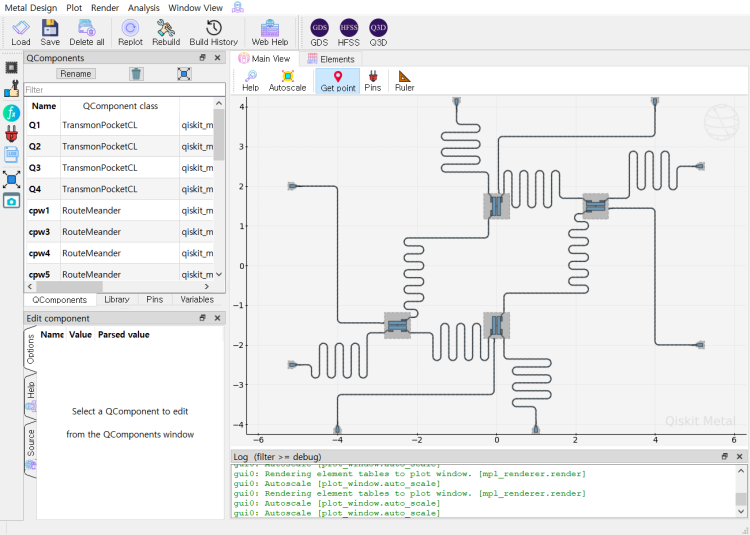

In [10]:
gui.autoscale()
gui.screenshot(name="full_design")

In [11]:
import numpy as np
from scipy.constants import c, h, pi, hbar, e
from qiskit_metal.analyses.em.cpw_calculations import guided_wavelength

# constants:
phi0    = h/(2*e)
varphi0 = phi0/(2*pi)

# project target parameters
f_qList = np.around(np.linspace(5.25, 5.75, 4),2) # GHz
f_rList = f_qList + 1.8 # GHz
L_JJList = np.around(varphi0**2/((f_qList*1e9+300e6)**2/(8*300e6))/h*1e9, 2) # nH

# initial CPW readout lengths
def find_resonator_length(frequency, line_width, line_gap, N): 
    #frequency in GHz
    #line_width/line_gap in um
    #N -> 2 for lambda/2, 4 for lambda/4
    
    [lambdaG, etfSqrt, q] = guided_wavelength(frequency*10**9, line_width*10**-6,
                                              line_gap*10**-6, 750*10**-6, 200*10**-9)
    return str(lambdaG/N*10**3)+" mm"

find_resonator_length(f_rList, 10, 6, 2)

'[8.63311117 8.42983847 8.24707774 8.06138195] mm'

In [12]:
find_resonator_length(np.around(np.linspace(8, 9.2, 4), 2), 10, 6, 2)

'[7.60792921 7.24564687 6.91629928 6.61559061] mm'

In [13]:
transmons[0].options.pad_gap    = '40um'
transmons[0].options.pad_width  = '550um' # 405
transmons[0].options.pad_height = '120um'

transmons[1].options.pad_gap    = '40um'
transmons[1].options.pad_width  = '390um' # 405
transmons[1].options.pad_height = '120um'
transmons[1].options.connection_pads.d.pad_gap='8um'
transmons[1].options.connection_pads.a.pad_gap='8um'
transmons[1].options.connection_pads.c.pad_gap='8um'
transmons[1].options.connection_pads.d.pad_width='140um'
transmons[1].options.connection_pads.a.pad_width='140um'
transmons[1].options.connection_pads.c.pad_width='150um'


transmons[2].options.pad_gap    = '40um'
transmons[2].options.pad_width  = '460um' # 405
transmons[2].options.pad_height = '120um'

transmons[3].options.pad_gap    = '40um'
transmons[3].options.pad_width  = '440um' # 405
transmons[3].options.pad_height = '120um'

readout_lines[0].options.total_length = '8.63mm'
readout_lines[1].options.total_length = '8.42mm'
readout_lines[2].options.total_length = '8.24mm'
readout_lines[3].options.total_length = '8.06mm'

cpw[0].options.total_length = '7mm'
cpw[1].options.total_length = '7mm'
cpw[2].options.total_length = '7mm'
cpw[3].options.total_length = '7mm'

gui.rebuild()
gui.autoscale()

qcomps = design.components  # short handle (alias)
qcomps['Q1'].options['hfss_inductance'] = 'Lj1'
qcomps['Q1'].options['hfss_capacitance'] = 'Cj1'
qcomps['Q2'].options['hfss_inductance'] = 'Lj2'
qcomps['Q2'].options['hfss_capacitance'] = 'Cj2'
qcomps['Q3'].options['hfss_inductance'] = 'Lj3'
qcomps['Q3'].options['hfss_capacitance'] = 'Cj3'
qcomps['Q4'].options['hfss_inductance'] = 'Lj4'
qcomps['Q4'].options['hfss_capacitance'] = 'Cj4'

### Q3D Analysis

In [14]:
from qiskit_metal.analyses.quantization import EPRanalysis, LOManalysis

c1 = LOManalysis(design, "q3d")
q3d1 = c1.sim.renderer
q3d1.start()

q3d1.activate_ansys_design("Q2only_busopen", 'capacitive')
q3d1.render_design(['Q2', 'R2', 'cpw1', 'cpw5', 'ol2', 'line_cl2', 'CL2'], [('cpw5', 'end'),('cpw1', 'start')])

q3d1.add_q3d_setup(name="Setup", max_passes=15, min_converged_passes=5,percent_error=0.05)
q3d1.analyze_setup("Setup")
c1.sim.capacitance_matrix, c1.sim.units = q3d1.get_capacitance_matrix()
c1.sim.capacitance_all_passes, _ = q3d1.get_capacitance_all_passes()
c1.sim.capacitance_matrix

INFO 01:01PM [connect_project]: Connecting to Ansys Desktop API...
INFO 01:01PM [load_ansys_project]: 	Opened Ansys App
INFO 01:01PM [load_ansys_project]: 	Opened Ansys Desktop v2018.0.0
INFO 01:01PM [load_ansys_project]: 	Opened Ansys Project
	Folder:    C:/Users/byoungwookang/Documents/Ansoft/
	Project:   Project12
INFO 01:01PM [connect_design]: No active design found (or error getting active design).
INFO 01:01PM [connect]: 	 Connected to project "Project12". No design detected
01:01PM 26s WARNING [activate_ansys_design]: The design_name=Q2only_busopen was not in active project.  Designs in active project are: 
[].  A new design will be added to the project.  
INFO 01:01PM [connect_design]: 	Opened active design
	Design:    Q2only_busopen [Solution type: Q3D]
WARNING 01:01PM [connect_setup]: 	No design setup detected.
WARNING 01:01PM [connect_setup]: 	Creating Q3D default setup.
INFO 01:01PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.AnsysQ3DSetup'>)
INFO 01:01PM [get_

,a_connector_pad_Q2,c_connector_pad_Q2,cl_metal_Q2,d_connector_pad_Q2,ground_main_plane,launch_pad_CL2,launch_pad_R2,pad_bot_Q2,pad_top_Q2
a_connector_pad_Q2,1193.700000,-0.659820,-0.020757,-0.150430,-1172.300,-0.000398,-0.000949,-18.158000,-1.325400
c_connector_pad_Q2,-0.659820,1438.900000,-0.207500,-0.373380,-1411.600,-0.000583,-4.691500,-19.268000,-1.357000
cl_metal_Q2,-0.020757,-0.207500,981.180000,-0.410930,-975.160,-4.669800,-0.003927,-0.213200,-0.292220
d_connector_pad_Q2,-0.150430,-0.373380,-0.410930,1193.900000,-1172.000,-0.000823,-0.001726,-1.438800,-18.925000
ground_main_plane,-1172.300000,-1411.600000,-975.160000,-1172.000000,5204.400,-50.779000,-50.905000,-40.554000,-46.713000
launch_pad_CL2,-0.000398,-0.000583,-4.669800,-0.000823,-50.779,55.808000,-0.000194,-0.000238,-0.000281
launch_pad_R2,-0.000949,-4.691500,-0.003927,-0.001726,-50.905,-0.000194,55.840000,-0.001162,-0.001150
pad_bot_Q2,-18.158000,-19.268000,-0.213200,-1.438800,-40.554,-0.000238,-0.001162,107.090000,-27.111000
pad_top_Q2,-1.325400,-1.357000,-0.292220,-18.925000,-46.713,-0.000281,-0.001150,-27.111000,95.906000


In [15]:
import scqubits as scq

from qiskit_metal.analyses.quantization.lumped_capacitive import load_q3d_capacitance_matrix
from qiskit_metal.analyses.quantization.lom_core_analysis import CompositeSystem, Cell, Subsystem, QuantumSystemRegistry
                        
from scipy.constants import speed_of_light as c_light

import matplotlib.pyplot as plt
%matplotlib inline

01:35PM 54s INFO [__init__]: TransmonBuilder with system_type TRANSMON registered to QuantumSystemRegistry
01:35PM 54s INFO [__init__]: FluxoniumBuilder with system_type FLUXONIUM registered to QuantumSystemRegistry
01:35PM 54s INFO [__init__]: TLResonatorBuilder with system_type TL_RESONATOR registered to QuantumSystemRegistry
01:35PM 54s INFO [__init__]: LumpedResonatorBuilder with system_type LUMPED_RESONATOR registered to QuantumSystemRegistry


In [23]:
# Cell 2: Transmon-2
opt2 = dict(
    cap_mat = c1.sim.capacitance_matrix,
    ind_dict = {('pad_top_Q2', 'pad_bot_Q2'): 12},  # junction inductance in nH
    jj_dict = {('pad_top_Q2', 'pad_bot_Q2'): 'j2'},
    cj_dict = {('pad_top_Q2', 'pad_bot_Q2'): 1}, # junction capacitance in fF

)

cell_2 = Cell(opt2)

# subsystem 1: Transmon-2
transmon2 = Subsystem(name='transmon2', sys_type='TRANSMON', nodes=['j2'])

# Resonator Subsystems
q_opts = dict(
    Z0 = 50, # characteristic impedance in Ohm
    vp = 0.404314 * c_light # phase velocity 
)

ro2 = Subsystem(name='c_connector_pad_Q2', sys_type='TL_RESONATOR', nodes=['c_connector_pad_Q2'], q_opts=dict(f_res = 7.22, **q_opts))
coup12 = Subsystem(name='a_connector_pad_Q2', sys_type='TL_RESONATOR', nodes=['a_connector_pad_Q2'], q_opts=dict(f_res = 7.5, **q_opts))
coup24 = Subsystem(name='d_connector_pad_Q2', sys_type='TL_RESONATOR', nodes=['d_connector_pad_Q2'], q_opts=dict(f_res = 7.5, **q_opts))


composite_sys = CompositeSystem(
    subsystems=[transmon2, ro2, coup12, coup24], 
    cells=[cell_2],
    grd_node='ground_main_plane',
    nodes_force_keep=['c_connector_pad_Q2', 'a_connector_pad_Q2', 'd_connector_pad_Q2']
)

In [24]:
cg = composite_sys.circuitGraph()
print(cg)

node_jj_basis:
-------------

['j2', 'pad_bot_Q2', 'c_connector_pad_Q2', 'a_connector_pad_Q2', 'd_connector_pad_Q2', 'cl_metal_Q2', 'launch_pad_CL2', 'launch_pad_R2']

nodes_keep:
-------------

['j2', 'c_connector_pad_Q2', 'a_connector_pad_Q2', 'd_connector_pad_Q2']


L_inv_k (reduced inverse inductance matrix):
-------------

                          j2  c_connector_pad_Q2  a_connector_pad_Q2  \
j2                  0.083333                 0.0                 0.0   
c_connector_pad_Q2  0.000000                 0.0                 0.0   
a_connector_pad_Q2  0.000000                 0.0                 0.0   
d_connector_pad_Q2  0.000000                 0.0                 0.0   

                    d_connector_pad_Q2  
j2                                 0.0  
c_connector_pad_Q2                 0.0  
a_connector_pad_Q2                 0.0  
d_connector_pad_Q2                 0.0  

C_k (reduced capacitance matrix):
-------------

                           j2  c_connector_pad_Q2  a_c

In [25]:
hilbertspace = composite_sys.create_hilbertspace()
print(hilbertspace)

HilbertSpace:  subsystems
-------------------------

Transmon------------| [Transmon_3]
                    | EJ: 13621.792733898432
                    | EC: 298.3590037641503
                    | ng: 0.001
                    | ncut: 22
                    | truncated_dim: 10
                    |
                    | dim: 45


Oscillator----------| [Oscillator_7]
                    | E_osc: 7220.0
                    | l_osc: None
                    | truncated_dim: 3
                    |
                    | dim: 3


Oscillator----------| [Oscillator_8]
                    | E_osc: 7500.0
                    | l_osc: None
                    | truncated_dim: 3
                    |
                    | dim: 3


Oscillator----------| [Oscillator_9]
                    | E_osc: 7500.0
                    | l_osc: None
                    | truncated_dim: 3
                    |
                    | dim: 3




In [26]:
hilbertspace = composite_sys.add_interaction()
hilbertspace.hamiltonian()

Quantum object: dims = [[10, 3, 3, 3], [10, 3, 3, 3]], shape = (270, 270), type = oper, isherm = True
Qobj data =
[[-10847.47868202+0.00000000e+00j      0.        -5.42601369e-02j
       0.        +0.00000000e+00j ...      0.        +0.00000000e+00j
       0.        +0.00000000e+00j      0.        +0.00000000e+00j]
 [     0.        +5.42601369e-02j  -3347.47868202+0.00000000e+00j
       0.        -7.67354215e-02j ...      0.        +0.00000000e+00j
       0.        +0.00000000e+00j      0.        +0.00000000e+00j]
 [     0.        +0.00000000e+00j      0.        +7.67354215e-02j
    4152.52131798+0.00000000e+00j ...      0.        +0.00000000e+00j
       0.        +0.00000000e+00j      0.        +0.00000000e+00j]
 ...
 [     0.        +0.00000000e+00j      0.        +0.00000000e+00j
       0.        +0.00000000e+00j ...  60064.1601317 +0.00000000e+00j
       0.        -2.63578008e+02j      0.        +0.00000000e+00j]
 [     0.        +0.00000000e+00j      0.        +0.00000000e+00j
   

In [27]:
hamiltonian_results = composite_sys.hamiltonian_results(hilbertspace, evals_count=30)

Finished eigensystem.     

system frequencies in GHz:
--------------------------
{'transmon2': 5.381305494573826, 'c_connector_pad_Q2': 7.220780299212048, 'a_connector_pad_Q2': 7.5006110903821295, 'd_connector_pad_Q2': 7.501621942060121}

Chi matrices in MHz
--------------------------
                     transmon2  c_connector_pad_Q2  a_connector_pad_Q2  \
transmon2          -344.428176           -0.401652           -0.955615   
c_connector_pad_Q2   -0.401652            0.434882           -0.000402   
a_connector_pad_Q2   -0.955615           -0.000402            1.508502   
d_connector_pad_Q2   -0.042194            0.000095           -0.737401   

                    d_connector_pad_Q2  
transmon2                    -0.042194  
c_connector_pad_Q2            0.000095  
a_connector_pad_Q2           -0.737401  
d_connector_pad_Q2            0.511956  


In [28]:
composite_sys.compute_gs()

                    transmon2  c_connector_pad_Q2  a_connector_pad_Q2  \
transmon2            0.000000          -40.167192          -44.001230   
c_connector_pad_Q2 -40.167192            0.000000            3.319083   
a_connector_pad_Q2 -44.001230            3.319083            0.000000   
d_connector_pad_Q2  54.260307            1.539920            1.521220   

                    d_connector_pad_Q2  
transmon2                    54.260307  
c_connector_pad_Q2            1.539920  
a_connector_pad_Q2            1.521220  
d_connector_pad_Q2            0.000000  

In [29]:
transmons[1].options.connection_pads.d.pad_gap

'8um'